<a href="https://colab.research.google.com/github/Dileepsingh6432/Airbnb-Data-Analysis/blob/main/Final_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath ='/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
df = pd.read_csv(filepath)

Let's understand about Airbnb before doing anything.
Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.
Airbnb stands for "Air Bed and Breakfast," a name that reflects the company’s early origins—its co-founders invited paying guests to sleep on an air mattress in their living room to help cover the rent.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Find the unique number of columns in the dateframe
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Find the null values in the given dataset and remove unncessary collumn accordingly

In [ ]:
# find null values in dataframe
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
## Hence, the last_review and reviews_per_month has lots of null values so, remove these two columns
# delete method (del df['column_name']) or drop method (df = df.drop('column_name', axis=1)) 

df.drop(['last_review','reviews_per_month','latitude','longitude'], axis=1, inplace=True)


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
#looking for what is the columns (variables) here
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df['name'].value_counts() 
#an interesting observation, looks like few listings have no particular host name as below observation!
#also few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
#same for host 
df['host_id'].nunique()
#looks some hosts are listed in multiple property

37457

In [ ]:
df['host_name'].nunique()
#it's looklike that same host are listed with diffrent diffrent id

11452

Observation(s):-
We were trying to understand the two variables Host_id and host_name and their relationship with neighourhood and neighourhood group.
We found that-A particular host listed on multiple properties as well as in many neighourhoods.
And many hosts are listed in a particular property.

## What can we learn about different hosts and areas?:

### Find the highest number of host listings (calculated_host_listings_count) in descending order 

In [ ]:
# Find the calculated host listings count
df1=df.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index().sort_values(by='calculated_host_listings_count', ascending=False).head()
df1

,host_name,calculated_host_listings_count
9781,Sonder (NYC),327
1356,Blueground,232
5336,Kara,121
5471,Kazuya,103
9780,Sonder,96


Text(0, 0.5, 'Host Listing Counts')

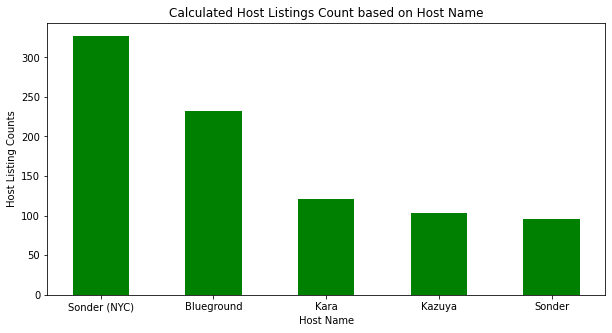

In [ ]:

plt.rcParams['figure.figsize'] = (10, 5)

plt.bar(df1['host_name'], df1['calculated_host_listings_count'], color ='green',
        width = 0.5)
plt.title("Calculated Host Listings Count based on Host Name")
plt.xlabel("Host Name")
plt.ylabel("Host Listing Counts")


 Here, Sonder (NYC), Blueground, Kara, and Kazuya has highest number of listings

In [ ]:
# Find the number of listing areawise (neighbourhood) using groupby operation
df2 = df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count', ascending=False)
df2

,neighbourhood_group,calculated_host_listings_count
2,Manhattan,277073
1,Brooklyn,45925
3,Queens,23005
0,Bronx,2437
4,Staten Island,865


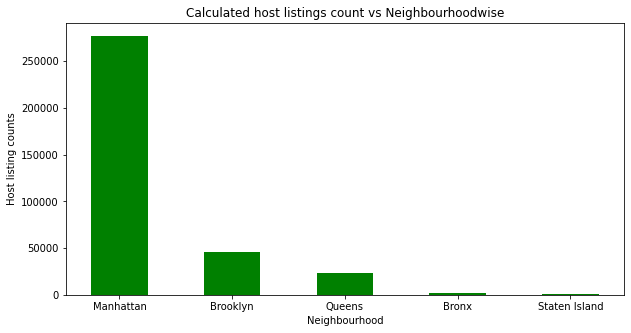

In [ ]:
fig = plt.figure(figsize = (10, 5))


plt.bar(df2['neighbourhood_group'], df2['calculated_host_listings_count'], color ='green',
        width = 0.5)
plt.title("Calculated host listings count vs Neighbourhoodwise")
plt.xlabel("Neighbourhood")
plt.ylabel("Host listing counts")

plt.show()

#### Here, the number of listings are highest in Manhattan  

### Which areas (and hosts) are the compartively busiest? 

In [ ]:
#sort the number of reviews relative to each neighbourhood to find the busiest area
busiest_areas =df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index().sort_values(by = 'number_of_reviews', ascending =False)
busiest_areas.set_index('neighbourhood_group')

,number_of_reviews
neighbourhood_group,
Brooklyn,486574
Manhattan,454569
Queens,156950
Bronx,28371
Staten Island,11541


Text(0, 0.5, 'Number of Reviews')

<Figure size 720x360 with 0 Axes>

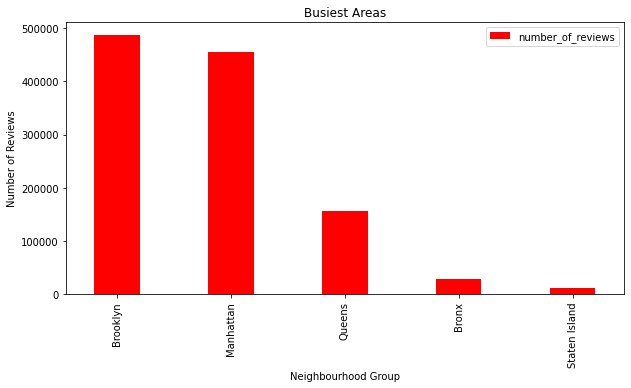

In [ ]:
# Depict the graph between 'number of reviews v/s Neighourhood group
fig = plt.figure(figsize = (10, 5))
busiest_areas.set_index('neighbourhood_group').plot(kind='bar', color='red', width=0.4)
plt.title("Busiest Areas")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Reviews")

We found that Brooklyn is the most busiest place followed by Manhattan and queens by this also we can say that brooklyn is the most popular place.

## Let's find availbility

In [ ]:
# Find the availbility of rooms in the given neighbourhood.
df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().reset_index().sort_values(by = 'neighbourhood_group', ascending =False)

,neighbourhood_group,room_type,availability_365
12,Staten Island,Entire home/apt,178.073864
13,Staten Island,Private room,226.361702
14,Staten Island,Shared room,64.777778
9,Queens,Entire home/apt,132.267176
10,Queens,Private room,149.222716
11,Queens,Shared room,192.186869
6,Manhattan,Entire home/apt,117.140996
7,Manhattan,Private room,101.845026
8,Manhattan,Shared room,138.572917
3,Brooklyn,Entire home/apt,97.205147


We found that Staten island with Private room have highest avaibility followed by Staten island entire room and queens

##Which areas are most expensive relative to others?

In [ ]:
# Find expensive areas based on its price and room types
expensive_areas_list = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
expensive_areas_list

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

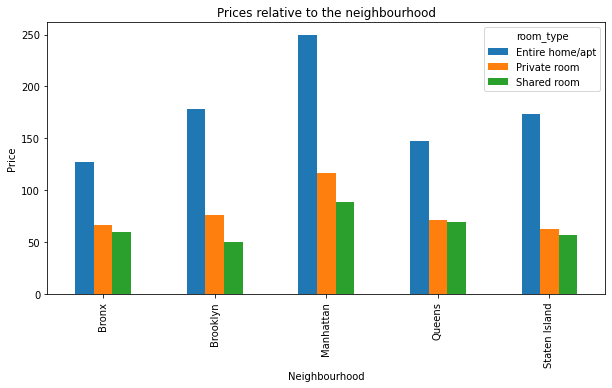

In [ ]:
# creating the bar plot to show the prices in different neighbourhood considering the room type
plt.figure(figsize=(10,5))
expensive_areas_list.plot(kind='bar')
plt.title("Prices relative to the neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")


Manhattan has more listed properties with Entire home/apt followed by Brooklyn.

Private rooms are more in Brooklyn followed by Manhattan.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

let's check about Which hosts are charging more relative to others without outliers.

### Hotel fare comparison based on different types of rooms (avg spending of people on each room)

In [ ]:
dict_ = {}

types_of_rooms = list(df['room_type'].unique())
for rooms in types_of_rooms:
    dict_[rooms] = df[df['room_type'] == rooms].price.sum()/df[df['room_type'] == rooms].price.count()

key, value =  list(dict_.keys()), list(dict_.values())

k = pd.DataFrame({'Rooms': key, 'Average Price': value})

k

,Rooms,Average Price
0,Private room,89.780973
1,Entire home/apt,211.794246
2,Shared room,70.127586


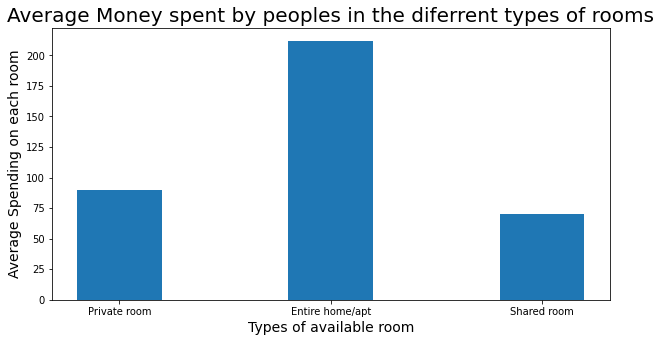

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(k['Rooms'], k['Average Price'],
        width = 0.4)
 
plt.xlabel("Types of available room", fontsize = 14)
plt.ylabel("Average Spending on each room", fontsize = 14)
plt.title("Average Money spent by peoples in the diferrent types of rooms", fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


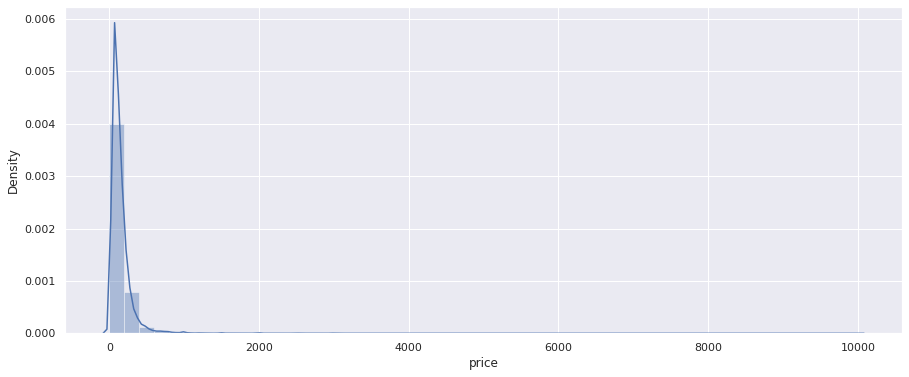

In [ ]:
# Let us analyse the price distribution using distplot
sns.set(rc={"figure.figsize": (15, 6)})
sns.distplot(df["price"], hist=True)

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables i.e. data distribution of a variable against the density distribution. In above graph we can see that our graph have right tail(right skewed) it meansthat means our most of data centered near peak of the graph but there is a some highly expensive price that leads to a seperate trends that's why our graph showing right trends.

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
print("Skewness of price data: %f" % df['price'].skew())
print("Kurtosis of price data: %f" % df['price'].kurt())

Skewness of price data: 19.118939
Kurtosis of price data: 585.672879


We can say that the skewness indicates how much our underlying distribution deviates from the normal distribution or how much our distribution deviated from our median value since the normal distribution has skewness 0. The extreme positive skewness is not desirable for distribution, as a high level of skewness can cause misleading results.

Kurtosis refers to the degree of presence of outliers in the distribution.Kurtosis is a statistical measure, whether the data is heavy-tailed or light-tailed in a normal distribution.

A large kurtosis is associated with a high level of risk it preferable near zero.

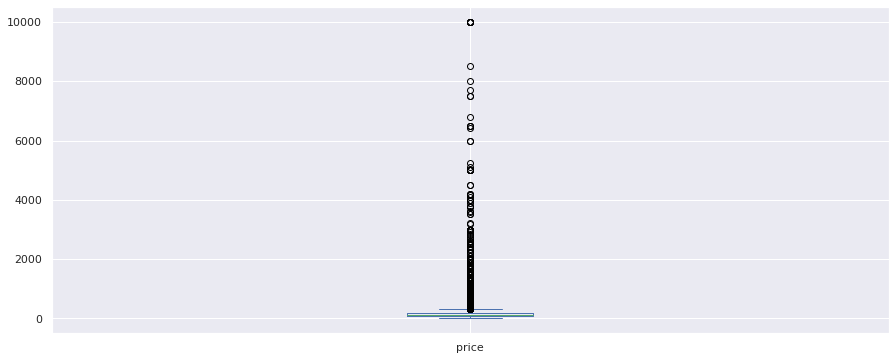

In [ ]:
df['price'].plot(kind="box")

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). in above plot we can see that most of the data is around the median but there is some data which is far away from the median. Our data has some outliers which are outside of Q1 and Q2 we have to remove this.

# **Outliers Treatments**

In [ ]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['price'])
df[(df.price < lower_bound) | (df.price > upper_bound)] #Looking at the lower and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,Entire home/apt,375,180,5,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,Entire home/apt,800,1,25,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,Entire home/apt,500,4,46,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,Entire home/apt,350,2,7,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,Entire home/apt,400,2,16,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,Entire home/apt,350,2,0,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,Entire home/apt,475,2,0,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,Private room,800,1,0,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,Entire home/apt,350,1,0,1,9


In [ ]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively

dfnp = df[(df.price>lower_bound) & (df.price<upper_bound)]
dfnp

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


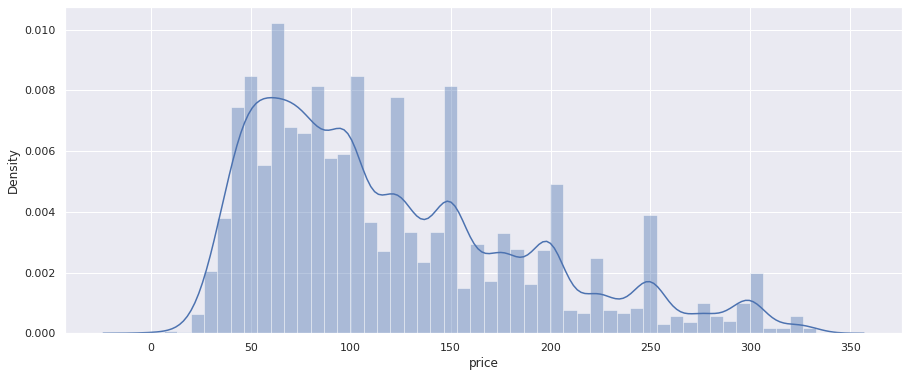

In [ ]:
#Now, use the distplot to show the price distribution
sns.set(rc={"figure.figsize": (15, 6)})
sns.distplot(dfnp["price"], hist=True)

In [ ]:
print("Skewness of price data: %f" % dfnp['price'].skew())
print("Kurtosis of price data: %f" % dfnp['price'].kurt())

Skewness of price data: 0.922925
Kurtosis of price data: 0.169543


After removing outliers now we can see that most of the data is between 50 to 300 and there is no right tail in our graph which shows that our data is close to median aur mean value. And the skewness is also less than 1 which shows that our data is normally distributed which is a good sign. And kurtos is also very close to zero, it means there are no outliers in our data and there is no risky data.

In [ ]:
dfnp['price'].describe()

count    45918.000000
mean       119.947014
std         68.117249
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        333.000000
Name: price, dtype: float64

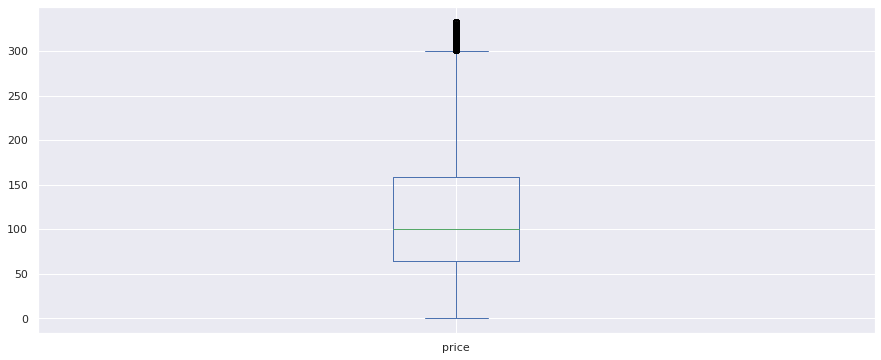

In [ ]:
#the boxplot for price now looks good without outliers!
dfnp['price'].plot(kind="box")

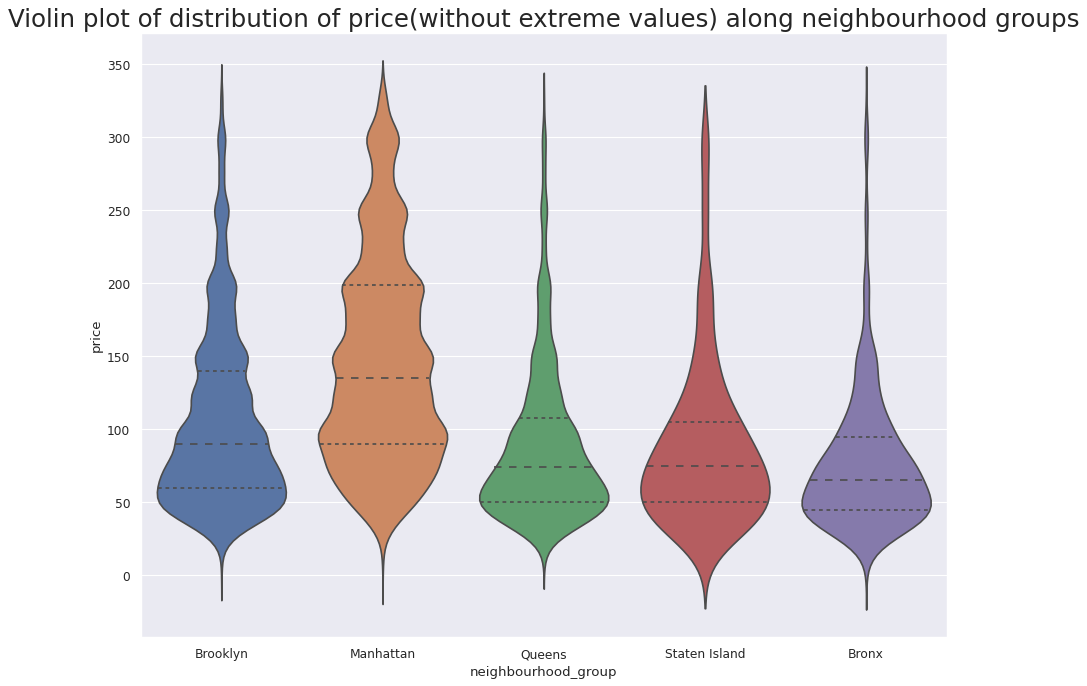

In [ ]:
#Now let's understand the distribution of price(without extreme values) along neighbourhood groups
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='neighbourhood_group', y='price', data=dfnp, scale='width', inner='quartile')

# Decoration
plt.title('Violin plot of distribution of price(without extreme values) along neighbourhood groups', fontsize=22)
plt.show()

in above voilin plot is showing which price is most popular llike in brooklyn most of the price varries between 35 to 80 that is the most popular range.

# **Which hosts are charging more relative to others?**

In [ ]:
# Find the mean price of each neighbourhood considering the room types
most_expensive_hosts = df.groupby(['host_name','room_type'])['price'].mean().reset_index().sort_values(by='price', ascending=False)
most_expensive_hosts_list= most_expensive_hosts.set_index('host_name').head(15)
most_expensive_hosts_list

,room_type,price
host_name,,
Kathrine,Private room,10000.0
Olson,Entire home/apt,9999.0
Rum,Entire home/apt,8500.0
Jay And Liz,Entire home/apt,6000.0
Jelena,Entire home/apt,5075.0
Sarah-2,Entire home/apt,5000.0
Sarah-B,Entire home/apt,5000.0
Nony,Entire home/apt,4200.0
Rasmus,Entire home/apt,3750.0


Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

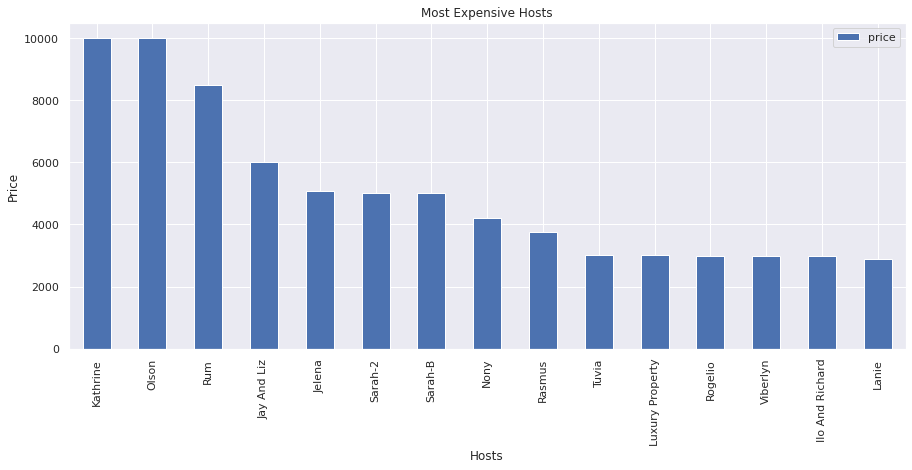

In [ ]:
#plot a bar graph to depict the host lists who are charging more
plt.figure(figsize=(10,5))
 

most_expensive_hosts_list.plot(kind='bar')
plt.title("Most Expensive Hosts")
plt.xlabel("Hosts")
plt.ylabel("Price")

**let's check about Which hosts are charging more relative to others without outliers.**

In [ ]:
most_expensive_hosts_filtered = dfnp.groupby(['host_name','room_type'])['price'].mean().reset_index().sort_values(by='price', ascending=False)
most_expensive_hosts_list_filtered= most_expensive_hosts.set_index('host_name').head(15)
most_expensive_hosts_list_filtered

,room_type,price
host_name,,
Kathrine,Private room,10000.0
Olson,Entire home/apt,9999.0
Rum,Entire home/apt,8500.0
Jay And Liz,Entire home/apt,6000.0
Jelena,Entire home/apt,5075.0
Sarah-2,Entire home/apt,5000.0
Sarah-B,Entire home/apt,5000.0
Nony,Entire home/apt,4200.0
Rasmus,Entire home/apt,3750.0


Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

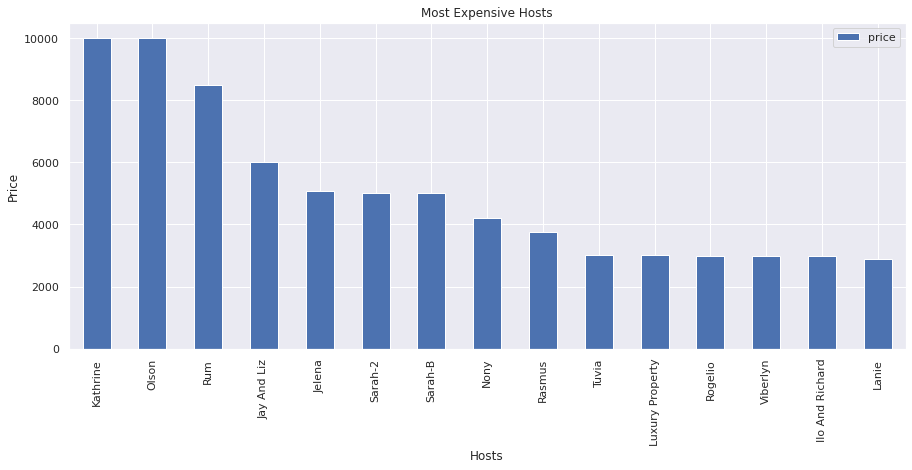

In [ ]:
#plot a bar graph to depict the host lists who are charging more
plt.figure(figsize=(10,5))
 

most_expensive_hosts_list_filtered.plot(kind='bar')
plt.title("Most Expensive Hosts")
plt.xlabel("Hosts")
plt.ylabel("Price")

here we can see that with outliers data kathrena is the most expensive host with price 10000 followed by Oloson with price 9999 and Rum with price 8500.
but without outliers price for all host almost the same between 333 to 325 that is the most popular price range for all.

## **What rooms are booked (preferable) most compared to other types based on the number of ratings? (basis of avg review).**

In [ ]:
preferable_room_type = df.groupby(['room_type'])['number_of_reviews'].sum().reset_index()

Text(0, 0.5, 'Average number of Reviews')

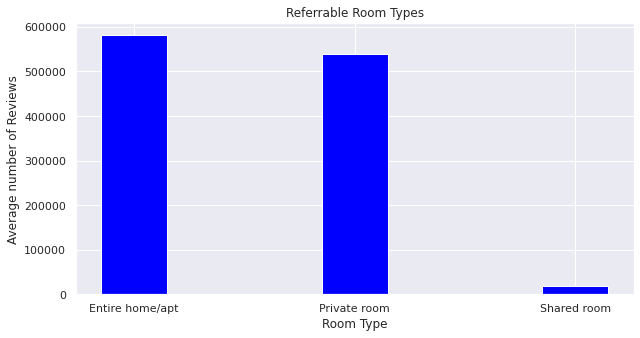

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(preferable_room_type['room_type'], preferable_room_type['number_of_reviews'], color='blue', width=0.3)

plt.title("Referrable Room Types")
plt.xlabel("Room Type")
plt.ylabel("Average number of Reviews")


### **Find out the occupancies of rooms and its types based on its price.**

In [ ]:
occupancies_of_rooms_based_on_price= df.groupby(['price','room_type'])['number_of_reviews'].sum().reset_index()
occupancies_of_rooms_based_on_price

,price,room_type,number_of_reviews
0,0,Entire home/apt,3
1,0,Private room,367
2,0,Shared room,7
3,10,Entire home/apt,187
4,10,Private room,52
...,...,...,...
1108,8500,Entire home/apt,2
1109,9999,Entire home/apt,1
1110,9999,Private room,6
1111,10000,Entire home/apt,5


Text(0.5, 1.0, 'Number of Reviews relative v/s Cost(Price)')

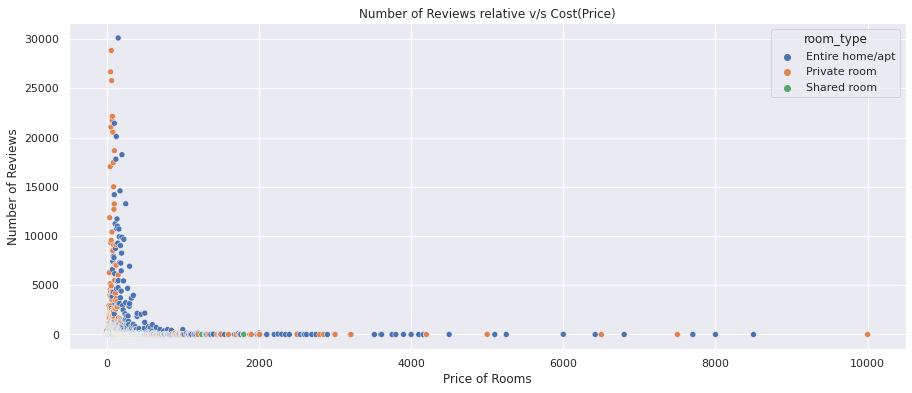

In [ ]:
# scatter plot between the number of reviews and price considering room types
sns.scatterplot(x='price', y='number_of_reviews', hue='room_type', data=occupancies_of_rooms_based_on_price)
plt.xlabel("Price of Rooms")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews relative v/s Cost(Price)")

### So, least expensive rooms are booked more, and enitre home/apt is booked more.

### Show the correlation between the 'price','number_of_reviews','minimum_nights', and 'availability_365'

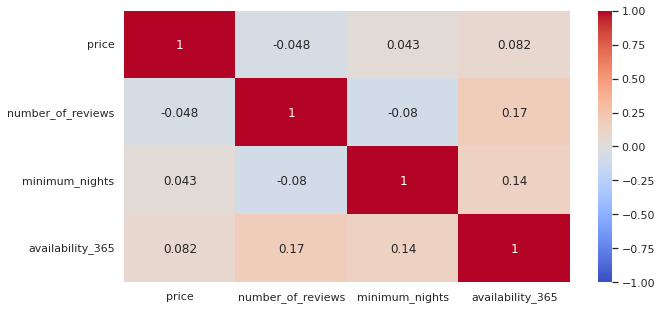

In [ ]:
# Use heatmap
corr_df = df[['price','number_of_reviews','minimum_nights','availability_365']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)


# **Where people are staying more?**

---



In [ ]:
preferable_room_types = df.groupby(['price','room_type'])['minimum_nights'].sum().reset_index().sort_values(by='minimum_nights', ascending=False)
preferable_room_types

,price,room_type,minimum_nights
355,150,Entire home/apt,11663
104,50,Private room,9275
460,200,Entire home/apt,8820
239,100,Entire home/apt,7784
547,250,Entire home/apt,7068
...,...,...,...
764,415,Private room,1
138,61,Shared room,1
1029,1497,Entire home/apt,1
1028,1495,Entire home/apt,1


Text(0.5, 1.0, 'Price v/s Minimum Nights')

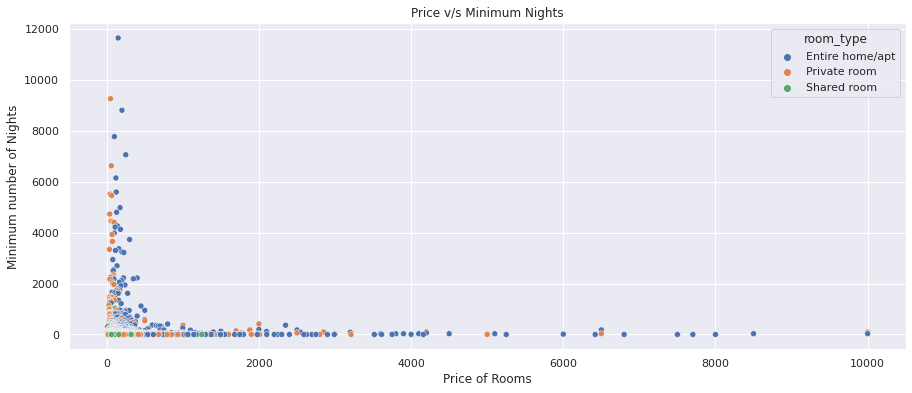

In [ ]:
sns.scatterplot(x='price', y='minimum_nights', hue='room_type', data=preferable_room_types)
plt.xlabel("Price of Rooms")
plt.ylabel("Minimum number of Nights")
plt.title("Price v/s Minimum Nights")

## **On an average for how many nights people stayed in each room_types!**

Text(0, 0.5, 'Room Types')

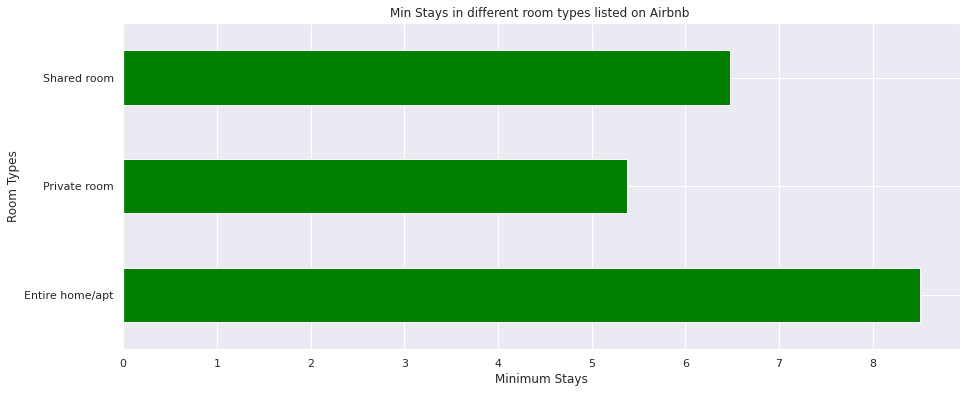

In [ ]:
df.groupby('room_type')['minimum_nights'].mean().plot(kind='barh' ,color='green')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Minimum Stays')
plt.ylabel('Room Types')

In [ ]:
df_va = df.groupby(['neighbourhood_group'])['host_name'].nunique()
df_va

neighbourhood_group
Bronx             652
Brooklyn         6075
Manhattan        5972
Queens           2424
Staten Island     220
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Number of different host in the neighbourhood group')

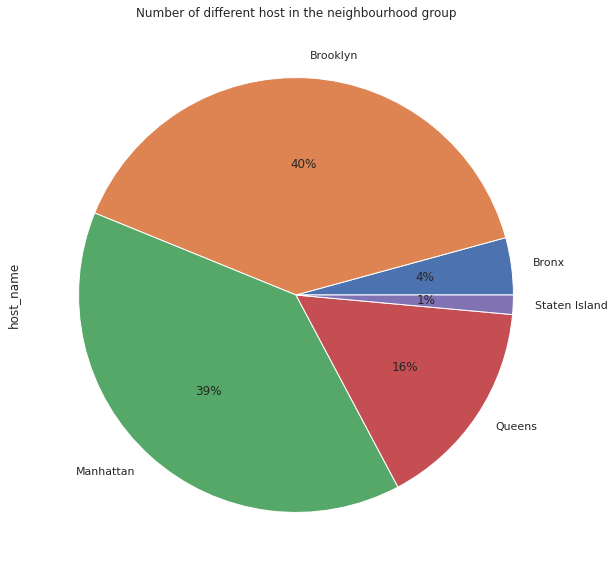

In [ ]:
plt.figure(figsize=(15,10))
# Here we are defining the plot in percentage
df_va.plot(kind='pie', autopct='%1.0f%%')
plt.title('Number of different host in the neighbourhood group')

## Provide a competitive market price for a newly added Airbnb listing given its attributes.

In [ ]:
dict_1 = {}
dict_2 = {}
df['price_for_a_night'] = df['price'] / df['minimum_nights']

neighbourhood = list(df['neighbourhood'].unique())

for n in neighbourhood:
    if n not in dict_1.keys():
        dict_1[n] = df[df['neighbourhood'] == n].price_for_a_night.mean()


neighbourhood_group = list(df['neighbourhood_group'].unique())

for n in neighbourhood_group:
    if n not in dict_2.keys():
        dict_2[n] = df[df['neighbourhood_group'] == n].price_for_a_night.mean()


print(dict_1)
print(dict_2)

{'Kensington': 43.84100973312402, 'Midtown': 116.7877506140355, 'Harlem': 56.220558627215595, 'Clinton Hill': 97.14083444140124, 'East Harlem': 65.66708213702739, 'Murray Hill': 75.04385383125518, 'Bedford-Stuyvesant': 50.64088809913628, "Hell's Kitchen": 92.86650133041647, 'Upper West Side': 83.84466993876656, 'Chinatown': 78.74120281143955, 'South Slope': 60.799334357398884, 'West Village': 119.99581856068899, 'Williamsburg': 64.36996941658603, 'Fort Greene': 60.024845764254856, 'Chelsea': 112.22597076922871, 'Crown Heights': 52.03237239338046, 'Park Slope': 71.68157887746193, 'Windsor Terrace': 53.03473507293257, 'Inwood': 44.46652533594242, 'East Village': 86.4162499502153, 'Greenpoint': 59.989788567565924, 'Bushwick': 41.09630687782089, 'Flatbush': 45.18247227018491, 'Lower East Side': 81.88573140477506, 'Prospect-Lefferts Gardens': 50.5186977399311, 'Long Island City': 69.53234891647134, 'Kips Bay': 91.3581754103848, 'SoHo': 121.66667258923972, 'Upper East Side': 82.6345874222400

In [ ]:
#DataFrame contains competetive price in the unique neighbourhoods group
pd.DataFrame({'Neighbourhood Group' : list(dict_2.keys()), 'Competetive Price' : list(dict_2.values())})

,Neighbourhood Group,Competetive Price
0,Brooklyn,57.428778
1,Manhattan,86.945981
2,Queens,55.307232
3,Staten Island,65.941963
4,Bronx,50.703610


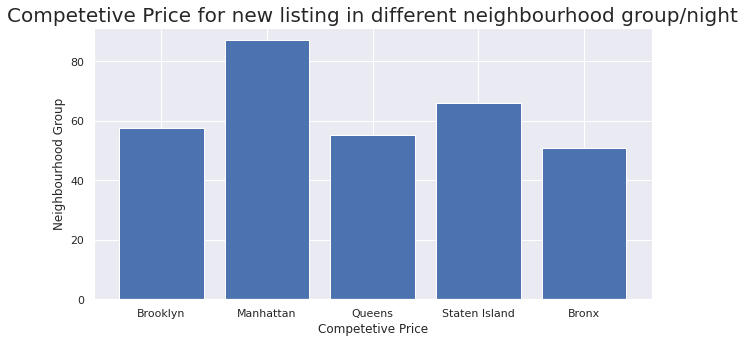

In [ ]:
plt.figure(figsize = (10, 5))
plt.bar(list(dict_2.keys()),list(dict_2.values()))
plt.title("Competetive Price for new listing in different neighbourhood group/night", fontsize = 20)
plt.xlabel('Competetive Price')
plt.ylabel('Neighbourhood Group')
plt.show() 